In [43]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from numpy import nan


In [45]:
midwest_data = pd.read_csv('MidwestMurderData.csv')
midwest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145080 entries, 0 to 145079
Data columns (total 32 columns):
ID              145080 non-null object
CNTYFIPS        145080 non-null object
Ori             145080 non-null object
State           145080 non-null object
Agency          145080 non-null object
Agentype        145080 non-null object
Source          145080 non-null object
Solved          145080 non-null object
Year            145080 non-null int64
StateName       145080 non-null object
Month           145080 non-null object
Incident        145080 non-null int64
ActionType      145080 non-null object
Homicide        145080 non-null object
Situation       145080 non-null object
VicAge          145080 non-null int64
VicSex          145080 non-null object
VicRace         145080 non-null object
VicEthnic       145080 non-null object
OffAge          145080 non-null int64
OffSex          145080 non-null object
OffRace         145080 non-null object
OffEthnic       145080 non-null obj

In [46]:
print('Homocide:', midwest_data[midwest_data.Homicide == 'Murder and non-negligent manslaughter'].ID.count())
print('Negligent manslaughter:', midwest_data[midwest_data.Homicide != 'Murder and non-negligent manslaughter'].ID.count())

Homocide: 143188
Negligent manslaughter: 1892


In [47]:
# Offender count by gender
print('Male offender count is:',midwest_data['OffSex'].value_counts()['Male'])
print('Female offender count is:',midwest_data['OffSex'].value_counts()['Female'])
print('Unknown offender count is:',midwest_data['OffSex'].value_counts()['Unknown'])


Male offender count is: 87750
Female offender count is: 12146
Unknown offender count is: 45184


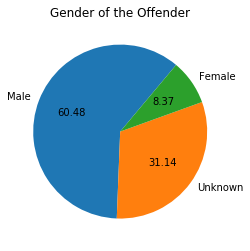

In [65]:
offender_gender = pd.DataFrame(midwest_data, columns = ['OffSex']) 
count_offender_gender = offender_gender.stack().value_counts()
ax = count_offender_gender.plot(kind = 'pie',
                              title = 'Gender of the Offender',
                              startangle = 10,
                              autopct='%.2f')
ax.set_ylabel('')
plt.show()

In [49]:
#Victim count by gender
print('Male victim count is:',midwest_data['VicSex'].value_counts()['Male'])
print('Female victim count is:',midwest_data['VicSex'].value_counts()['Female'])
print('Unknown victim count is:',midwest_data['VicSex'].value_counts()['Unknown'])

Male victim count is: 111465
Female victim count is: 33402
Unknown victim count is: 213


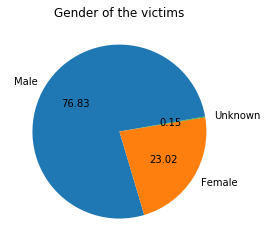

In [50]:
gender = pd.DataFrame(midwest_data, columns = ['VicSex']) 
count_gender = gender.stack().value_counts()
ax = count_gender.plot(kind = 'pie',
                              title = 'Gender of the victims',
                              startangle = 10,
                              autopct='%.2f')
ax.set_ylabel('')
plt.show()

In [51]:

# Solved vs unsolved crime
print('Unsolved:', midwest_data[midwest_data.Solved == 'No'].ID.count())
print('Solved:', midwest_data[midwest_data.Solved == 'Yes'].ID.count())

Unsolved: 45193
Solved: 99887


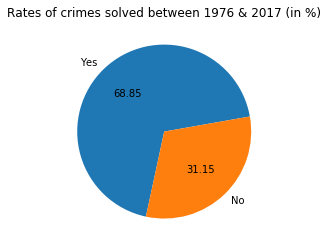

In [76]:
solved = pd.DataFrame(midwest_data, columns = ['Solved']) 
resolution = solved.stack().value_counts()
ax = resolution.plot(kind = 'pie',
                              title = 'Rates of crimes solved between 1976 & 2017 (in %)',
                              startangle = 10,
                              autopct='%.2f')
ax.set_ylabel('')
plt.show()

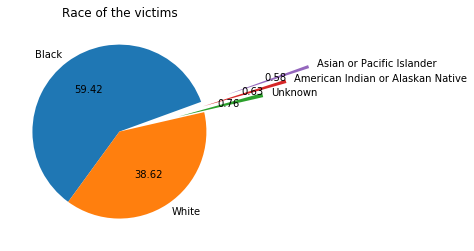

In [64]:
race = pd.DataFrame(midwest_data, columns = ['VicRace']) 
victim_race = race.stack().value_counts()
ax = victim_race.plot(kind = 'pie',
                              title = 'Race of the victims',
                              startangle = 20,
                              autopct='%.2f',
                              explode=(0, 0, 0.7, 1, 1.3))
ax.set_ylabel('')
plt.show()

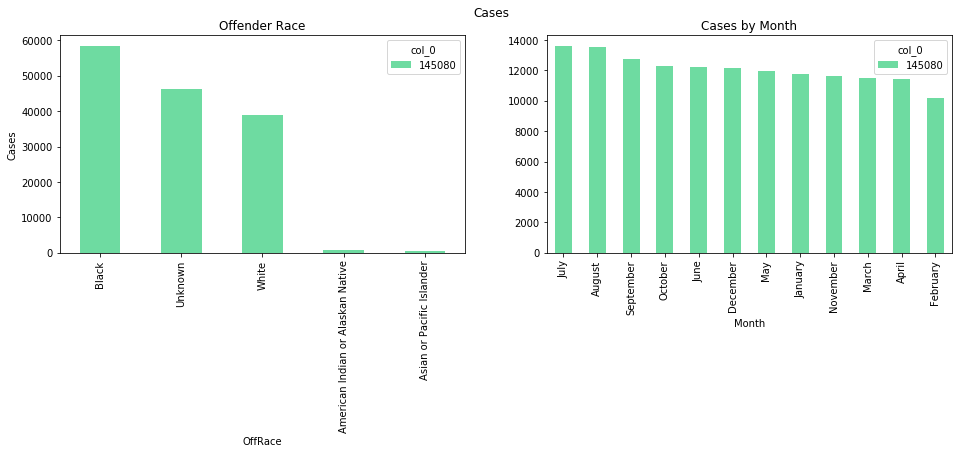

In [74]:

#races = midwest_data['Offender Race'].unique()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

#
ax = (pd.crosstab(midwest_data.OffRace,len(midwest_data.OffRace)).sort_values(len(midwest_data.OffRace), ascending=False).plot(kind='bar', color='#6EDBA1', title='Offender Race',ax=axes[0]))

fig.suptitle('Cases')
ax.set_ylabel('Cases')
# Cases by Month 
ax = (pd.crosstab(midwest_data.Month,len(midwest_data.Month))
        .sort_values(len(midwest_data.Month), ascending=False)
        .plot(kind='bar', color= '#6EDBA1',title ='Cases by Month', ax=axes[1]))

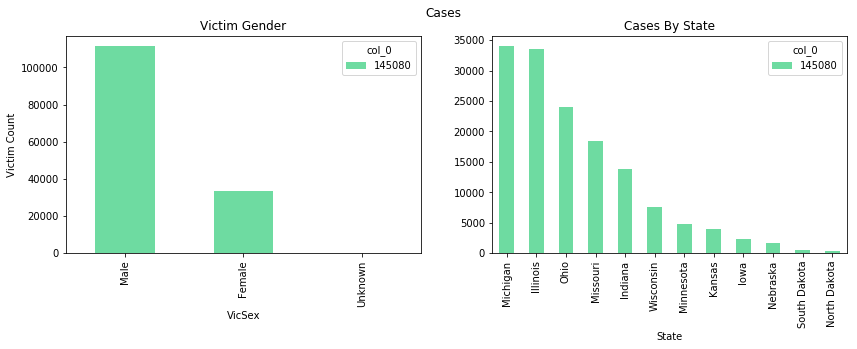

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

#
ax = (pd.crosstab(midwest_data.VicSex,len(midwest_data.VicSex)).sort_values(len(midwest_data.VicSex), ascending=False).plot(kind='bar', color='#6EDBA1', title='Victim Gender',ax=axes[0]))

fig.suptitle('Cases')
ax.set_ylabel('Victim Count')
# Cases per state
ax = (pd.crosstab(midwest_data.State,len(midwest_data.State))
        .sort_values(len(midwest_data.State), ascending=False)
        .plot(kind='bar', color= '#6EDBA1',title ='Cases By State', ax=axes[1]))




In [56]:
state_df = midwest_data[['VicSex', 'State', 'Month', 'Solved']]


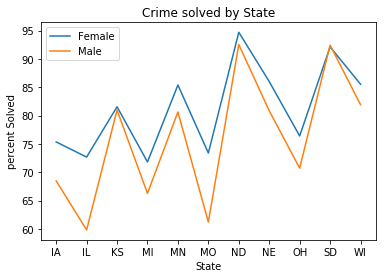

In [57]:
state_df['State']= state_df ["State"].replace({'Iowa':'IA', 
                                                'Michigan':'MI', 
                                               'South Dakota':'SD',
                                               'North Dakota':'ND', 
                                               'Missouri':'MO', 
                                               'Ohio':'OH', 
                                               'Nebraska':'NE', 
                                               'Kansas':'KS', 
                                               'Indiana':'IA', 
                                               'Minnesota':'MN', 
                                               'Wisconsin':'WI', 
                                               'Illinois':'IL'})


solved_state= state_df[['VicSex','State','Solved']]
solved_state=solved_state.groupby(by=['VicSex', 'State','Solved']).agg({ 'Solved':'count'})
solved_state= solved_state.groupby(level=[0,1]).apply(lambda x:100 * x/x.sum())
fig = plt.figure()
ax = fig.add_subplot(111)
solved_state.columns=["Solved_count"]

for name, group in solved_state.groupby(level=0):
    if name!="Unknown":
        group= group.reset_index().drop("VicSex",1)
        group=group[group["Solved"]=="Yes"]
        ax.plot(group["State"], group["Solved_count"], label=name)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.title('Crime solved by State')
plt.xlabel("State")
plt.ylabel("percent Solved")

plt.show()

In [58]:
vic_df = state_df[['VicSex','State']]
female = vic_df.loc[vic_df["VicSex"] =="Female", :]
female_victims = female.groupby('State').count()
female_victims_df = female_victims.rename(columns={"VicSex":'Female Victim'})
female_df = female_victims_df.reset_index().sort_values('Female Victim')


male = vic_df.loc[vic_df["VicSex"] == "Male", :]
male_victims = male.groupby('State').count()
male_victims_df = male_victims.rename(columns={"VicSex": "Male Victim"})
male_df = male_victims_df.reset_index().sort_values("Male Victim")


combined_df = pd.merge(female_df, male_df, on= "State", how= "left")

combined_df

,State,Female Victim,Male Victim
0,ND,151,241
1,SD,203,357
2,NE,529,1149
3,KS,1204,2740
4,MN,1431,3327
5,WI,2095,5423
6,MO,4030,14388
7,IA,4208,11893
8,OH,5986,18012
9,IL,6023,27525


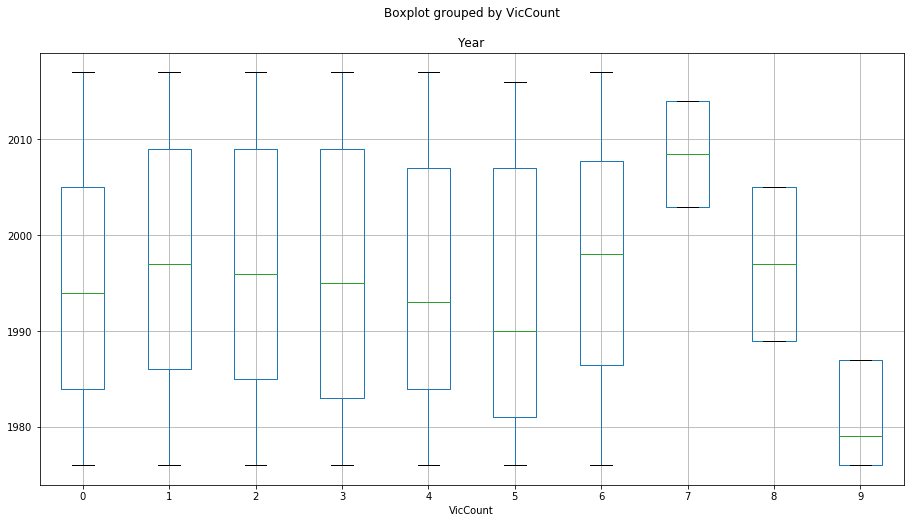

In [63]:
midwest_data.boxplot("Year", by="VicCount", figsize=(15, 8))

In [60]:
group0 = midwest_data[midwest_data["VicCount"] == 0]["Year"]
group1 = midwest_data[midwest_data["VicCount"] == 1]["Year"]
group2 = midwest_data[midwest_data["VicCount"] == 2]["Year"]
group3 = midwest_data[midwest_data["VicCount"] == 3]["Year"]
group4 = midwest_data[midwest_data["VicCount"] == 4]["Year"]
group5 = midwest_data[midwest_data["VicCount"] == 5]["Year"]
group6 = midwest_data[midwest_data["VicCount"] == 6]["Year"]
group7 = midwest_data[midwest_data["VicCount"] == 7]["Year"]
group8 = midwest_data[midwest_data["VicCount"] == 8]["Year"]
group9 = midwest_data[midwest_data["VicCount"] == 9]["Year"]


In [61]:
stats.f_oneway(group0,group1, group2,group3, group4, group5,group6, group7, group8, group9)

F_onewayResult(statistic=50.582914384047754, pvalue=3.0614042327996557e-92)

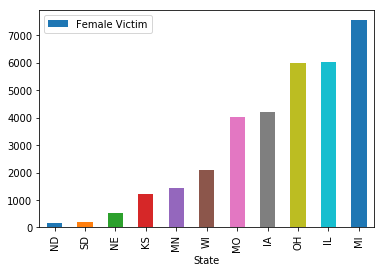

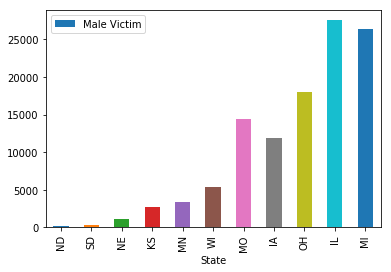

In [75]:
# probably dont need these ones
combined_df.plot(kind='bar',x='State',y='Female Victim',)

combined_df.plot(kind='bar',x='State',y='Male Victim',)



In [ ]:
# Extract individual groups
group1 = midwest_data[midwest_data["Month"] == 1]["VicAge"]
group2 = midwest_data[midwest_data["Month"] == 2]["VicAge"]
group3 = midwest_data[midwest_data["Month"] == 3]["VicAge"]

In [ ]:
stats.f_oneway(group1, group2, group3)

In [70]:

victim_group = midwest_data.groupby('Month')


# Count how many times each victim appears in our group
vic_count = victim_group['VicCount'].count()

vic_count

Month
April        11420
August       13515
December     12133
February     10187
January      11754
July         13625
June         12251
March        11521
May          11956
November     11658
October      12287
September    12773
Name: VicCount, dtype: int64

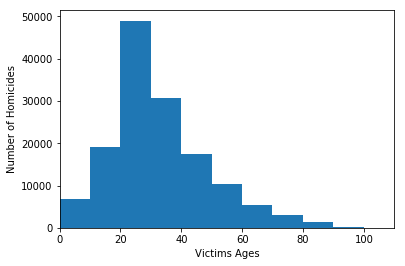

In [68]:
age = plt.hist(midwest_data['VicAge'],bins=100)
plt.xlabel('Victims Ages')
plt.ylabel('Number of Homicides');
age = plt.xlim(0,110)



plt.show()

In [69]:
#crimefile = []
#for col in midwest_data.columns.values:
    #if len(set(midwest_data[col])) < 50:
        #print(col, set(midwest_data[col]))
        #crimefile.append(col)
        
print(crimefile)

State {'Kansas', 'Nebraska', 'North Dakota', 'Wisconsin', 'Illinois', 'South Dakota', 'Minnesota', 'Ohio', 'Missouri', 'Indiana', 'Iowa', 'Michigan'}
Agentype {'Regional police', 'Tribal', 'Municipal police', 'Primary state LE', 'Special police', 'Sheriff', 'County police'}
Source {'FBI', 'MAP'}
Solved {'No', 'Yes'}
Year {1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017}
StateName {'MICH', 'S DAK', 'MO', 'WIS', 'IOWA', 'NEBR', 'MINN', 'IND', 'KANS', 'ILL', 'N DAK', 'OHIO'}
Month {'January', 'June', 'December', 'September', 'May', 'August', 'October', 'February', 'July', 'March', 'November', 'April'}
ActionType {'8', 'Normal update', '6', 'Adjustment', '5', '3', '2', '7', '4', '9'}
Homicide {'Manslaughter by negligence', 'Murder and non-negligent manslaughter'}
Situation {'Multiple victim